In [1]:
import os
import json
import swifter
import numpy as np
import pandas as pd
from glob import glob
import lyricsgenius as genius
from dotenv import load_dotenv
import matplotlib.pyplot as plt
from pandas.io.json import json_normalize

load_dotenv()
GENIUS_API_KEY = os.getenv('GENIUS_API_KEY')

In [12]:
api = genius.Genius(GENIUS_API_KEY)
artist = api.search_artist('arctic monkeys')
lyrics = artist.save_lyrics()

lyrics = []
for f_name in glob('./*.json'):
    config = json.loads(open(f_name).read())
    lyrics.append(config)

Searching for songs by arctic monkeys...

Changing artist name to 'Arctic Monkeys'
Song 1: "Do I Wanna Know?"
Song 2: "505"
Song 3: "Fluorescent Adolescent"
Song 4: "Arabella"
Song 5: "I Wanna Be Yours"
Song 6: "R U Mine?"
Song 7: "Why’d You Only Call Me When You’re High?"
Song 8: "Knee Socks"
Song 9: "No. 1 Party Anthem"
Song 10: "Four Out of Five"
Song 11: "Star Treatment"
Song 12: "Snap Out of It"
Song 13: "Tranquility Base Hotel & Casino"
Song 14: "Suck It and See"
Song 15: "Cornerstone"
Song 16: "One for the Road"
Song 17: "Crying Lightning"
Song 18: "Mardy Bum"
Song 19: "When the Sun Goes Down"
Song 20: "One Point Perspective"
Song 21: "I Bet You Look Good on the Dancefloor"
Song 22: "Fireside"
Song 23: "Teddy Picker"
Song 24: "The Ultracheese"
Song 25: "Do Me a Favour"
Song 26: "Brianstorm"
Song 27: "Only Ones Who Know"
Song 28: "Stop the World I Wanna Get Off With You"
Song 29: "Love Is a Laserquest"
Song 30: "A Certain Romance"
Song 31: "Batphone"
Song 32: "I Want It All"
Song

NameError: name 'pd' is not defined

In [55]:
df = pd.read_csv('./data/songs_raw.csv')

In [56]:
df.to_csv('./data/songs_raw.csv',index=False)

In [57]:
df = df[['release_date_for_display','release_date','title','album','description','lyrics']]

In [58]:
for col in df.columns:
    df[col] = df[col].replace(['',' ', '?'],np.nan)

In [59]:
df.dropna(inplace=True)
df.reset_index(drop=True,inplace=True)

In [60]:
a = df['album'].loc[0]

In [61]:
df['album'] = df['album'].apply(lambda x : eval(x)['name'])
df['description'] = df['description'].apply(lambda x: eval(x)['plain'])

df.head()

,release_date_for_display,release_date,title,album,description,lyrics
0,"June 18, 2013",2013-06-18,Do I Wanna Know?,AM,"“Do I Wanna Know” is the first single from AM,...",[Verse 1]\nHave you got colour in your cheeks?...
1,"April 18, 2007",2007-04-18,505,Favourite Worst Nightmare,“505” is one of the songs that marks a turning...,[Chorus]\nI'm going back to 505\nIf it's a sev...
2,"July 4, 2007",2007-07-04,Fluorescent Adolescent,Favourite Worst Nightmare,“Fluorescent Adolescent” is a ballad about get...,[Verse 1]\nYou used to get it in your fishnets...
3,"September 6, 2013",2013-09-06,Arabella,AM,A song about a space aged lover named Arabella...,[Verse 1]\nArabella's got some interstellar-ga...
4,"September 6, 2013",2013-09-06,I Wanna Be Yours,AM,The song reworks John Cooper Clarke’s poem of ...,[Verse 1]\nI wanna be your vacuum cleaner\nBre...


In [62]:
df.head()

,release_date_for_display,release_date,title,album,description,lyrics
0,"June 18, 2013",2013-06-18,Do I Wanna Know?,AM,"“Do I Wanna Know” is the first single from AM,...",[Verse 1]\nHave you got colour in your cheeks?...
1,"April 18, 2007",2007-04-18,505,Favourite Worst Nightmare,“505” is one of the songs that marks a turning...,[Chorus]\nI'm going back to 505\nIf it's a sev...
2,"July 4, 2007",2007-07-04,Fluorescent Adolescent,Favourite Worst Nightmare,“Fluorescent Adolescent” is a ballad about get...,[Verse 1]\nYou used to get it in your fishnets...
3,"September 6, 2013",2013-09-06,Arabella,AM,A song about a space aged lover named Arabella...,[Verse 1]\nArabella's got some interstellar-ga...
4,"September 6, 2013",2013-09-06,I Wanna Be Yours,AM,The song reworks John Cooper Clarke’s poem of ...,[Verse 1]\nI wanna be your vacuum cleaner\nBre...


In [63]:
df.sort_values(by=['album','title'], inplace=True)

In [64]:
df.head()

,release_date_for_display,release_date,title,album,description,lyrics
3,"September 6, 2013",2013-09-06,Arabella,AM,A song about a space aged lover named Arabella...,[Verse 1]\nArabella's got some interstellar-ga...
0,"June 18, 2013",2013-06-18,Do I Wanna Know?,AM,"“Do I Wanna Know” is the first single from AM,...",[Verse 1]\nHave you got colour in your cheeks?...
21,"September 6, 2013",2013-09-06,Fireside,AM,A beautiful song about how difficult it is to ...,[Verse 1]\nI can't explain but I wanna try\nTh...
4,"September 6, 2013",2013-09-06,I Wanna Be Yours,AM,The song reworks John Cooper Clarke’s poem of ...,[Verse 1]\nI wanna be your vacuum cleaner\nBre...
31,"September 6, 2013",2013-09-06,I Want It All,AM,"In a typical rock star mentality, Alex wants e...","[Verse 1]\nBlind faith, heartache\nMind games,..."


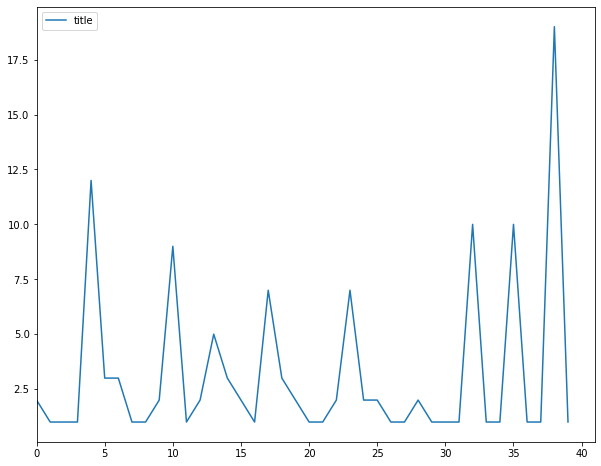

In [65]:
df.groupby(['release_date'],as_index=False).count()[['release_date','title']].plot(figsize=(10,8))
plt.xlim(0,)
plt.show()

In [66]:
df.to_parquet('./data/songs.parquet')

In [67]:
df.head()

,release_date_for_display,release_date,title,album,description,lyrics
3,"September 6, 2013",2013-09-06,Arabella,AM,A song about a space aged lover named Arabella...,[Verse 1]\nArabella's got some interstellar-ga...
0,"June 18, 2013",2013-06-18,Do I Wanna Know?,AM,"“Do I Wanna Know” is the first single from AM,...",[Verse 1]\nHave you got colour in your cheeks?...
21,"September 6, 2013",2013-09-06,Fireside,AM,A beautiful song about how difficult it is to ...,[Verse 1]\nI can't explain but I wanna try\nTh...
4,"September 6, 2013",2013-09-06,I Wanna Be Yours,AM,The song reworks John Cooper Clarke’s poem of ...,[Verse 1]\nI wanna be your vacuum cleaner\nBre...
31,"September 6, 2013",2013-09-06,I Want It All,AM,"In a typical rock star mentality, Alex wants e...","[Verse 1]\nBlind faith, heartache\nMind games,..."


In [68]:
import re

In [69]:
df['lyrics'] = df['lyrics'].apply(lambda x: )

In [74]:
re.sub('"\[(.*?)\]"gm',' ','[Verse 1]\nArabellas got some interstellar')


'[Verse 1]\nArabellas got some interstellar'